In [16]:
#%% Modules
import pyvisa as visa
import awg_support as awg
import numpy as np 
import matplotlib.pyplot as plt
import csv
import time
import serial

In [41]:
#%% Initialisation
# Setup for the tools
ID_awg = 'USB0::0xF4EC::0x1102::SDG2XFBC7R0482::INSTR'
rm = awg.resourcer()
inst_awg = awg.initialise(ID_awg, rm)

ser = serial.Serial('COM3', 115200, timeout=1)

In [42]:
sd = 1
Ts = 1/8e6
tw = np.arange(0, 1, Ts)

In [43]:
def run(sd):
    p = []
    bias = []
    while True:
        if ser.in_waiting > 0:
                try:
                    line = ser.readline()
                    val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                    #print(val)
                    if(val == "p"):
                        line = ser.readline()
                        val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                        # print(val, float(val))
                        p.append(float(val))
                        print("p = ", p[-1])
                    elif(val == "bias"):
                        line = ser.readline()
                        val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                        bias.append(int(val))
                        print("ts = ", bias[-1])
                    elif(val == "end"):
                        print("end")
                        break
                except ValueError:
                    continue
                except UnicodeDecodeError:
                    print("error")
    return p, bias

In [44]:
awg.set_output_state(inst_awg,channel=2,val="ON")
wave = np.random.normal(0,sd,size=np.shape(tw))
awg.arb_wave_constructor(inst_awg, wave, tw,freq=80e3,channel=2)

P, Bias = run(sd)

ser.close()
awg.set_output_state(inst_awg,channel=2,val="OFF")
awg.set_output_state(inst_awg,channel=1,val="OFF")
awg.deinitialise(inst_awg)
awg.deinitialise(rm)

p =  0.02
p =  0.03
p =  0.03
p =  0.05
p =  0.06
p =  0.1
p =  0.17
p =  0.25
p =  0.37
p =  0.46
p =  0.61
p =  0.73
p =  0.81
p =  0.93
p =  0.95
p =  0.94
end


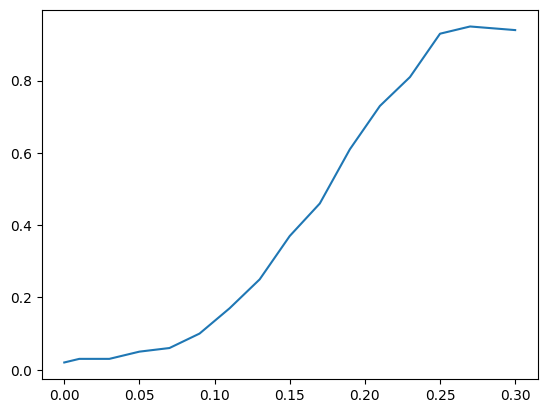

In [46]:
Bias = [0, 0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.3]
plt.plot(Bias,P)

In [47]:
print("sd = 1 =", P)

sd = 1 = [0.02, 0.03, 0.03, 0.05, 0.06, 0.1, 0.17, 0.25, 0.37, 0.46, 0.61, 0.73, 0.81, 0.93, 0.95, 0.94]


In [33]:
print("sd = 1.5 =", P)

sd = 1.5 = [0.17, 0.33, 0.59, 0.64, 0.76, 0.82, 0.87, 0.91, 0.92, 0.94, 0.94, 0.92, 0.91, 0.94, 0.92, 0.95]
